In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
 #for explainable
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image

In [2]:
#data gathering - accessing file directory
data_path = '/Users/paulivanespiritu/Documents/Jupyter/COVID'
train_path = '/Users/paulivanespiritu/Documents/Jupyter/COVID/train'
test_path = '/Users/paulivanespiritu/Documents/Jupyter/COVID/test'
os.listdir(train_path)

['.DS_Store', 'Viral Pneumonia', 'Normal', 'Covid']

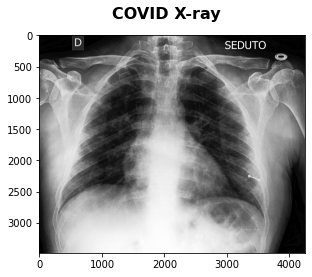

In [5]:
#checking if directory is accessible - Covid
covid_sample = imread(train_path+"/Covid"+"/01.jpeg")
plt.imshow(covid_sample)
plt.suptitle('Covid X-ray', fontsize=16, weight='bold');

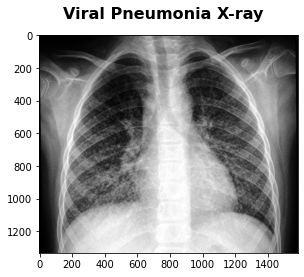

In [6]:
#checking if directory is accessible - Pneumonia
pneumonia_sample = imread(train_path+"/Viral Pneumonia"+"/01.jpeg")
plt.imshow(pneumonia_sample)
plt.suptitle('Viral Pneumonia X-ray', fontsize=16, weight='bold');

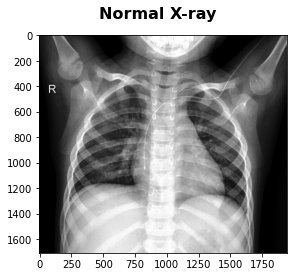

In [8]:
#checking if directory is accessible - normal xray
normal_sample = imread(train_path+"/Normal"+"/01.jpeg")
plt.imshow(normal_sample)
plt.suptitle('Normal X-ray', fontsize=16, weight='bold');

In [9]:
#Data Augmentation 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 249 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [10]:
#Using CNN 
image_size = (224,224,3)

model = Sequential()
model.add(Conv2D(64,(3,3),activation = "relu", input_shape = image_size))
model.add(MaxPool2D())

model.add(Conv2D( 128, (3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 512,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(3, activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       2

In [15]:
history = model.fit(training_set, validation_data=test_set,steps_per_epoch=15,epochs=100)

Epoch 1/100
15/15 [==============================] - 18s 1s/step - loss: 0.5856 - accuracy: 0.7725 - val_loss: 0.5298 - val_accuracy: 0.7385
Epoch 2/100
15/15 [==============================] - 18s 1s/step - loss: 0.5015 - accuracy: 0.7897 - val_loss: 2.1672 - val_accuracy: 0.3846
Epoch 3/100
15/15 [==============================] - 19s 1s/step - loss: 0.6036 - accuracy: 0.7811 - val_loss: 0.4873 - val_accuracy: 0.8000
Epoch 4/100
15/15 [==============================] - 19s 1s/step - loss: 0.5729 - accuracy: 0.7725 - val_loss: 0.6519 - val_accuracy: 0.8000
Epoch 5/100
15/15 [==============================] - 20s 1s/step - loss: 0.4089 - accuracy: 0.8326 - val_loss: 0.4843 - val_accuracy: 0.8462
Epoch 6/100
15/15 [==============================] - 20s 1s/step - loss: 0.5428 - accuracy: 0.7811 - val_loss: 0.4641 - val_accuracy: 0.7846
Epoch 7/100
15/15 [==============================] - 24s 2s/step - loss: 0.2879 - accuracy: 0.9013 - val_loss: 0.5978 - val_accuracy: 0.7231
Epoch 8/100
1

Epoch 59/100
15/15 [==============================] - 34s 2s/step - loss: 0.1469 - accuracy: 0.9227 - val_loss: 0.4543 - val_accuracy: 0.8615
Epoch 60/100
15/15 [==============================] - 34s 2s/step - loss: 0.1641 - accuracy: 0.9227 - val_loss: 0.3478 - val_accuracy: 0.8615
Epoch 61/100
15/15 [==============================] - 35s 2s/step - loss: 0.1693 - accuracy: 0.9356 - val_loss: 0.2666 - val_accuracy: 0.9231
Epoch 62/100
15/15 [==============================] - 36s 2s/step - loss: 0.1218 - accuracy: 0.9614 - val_loss: 0.2503 - val_accuracy: 0.9231
Epoch 63/100
15/15 [==============================] - 35s 2s/step - loss: 0.1341 - accuracy: 0.9458 - val_loss: 0.3715 - val_accuracy: 0.8923
Epoch 64/100
15/15 [==============================] - 35s 2s/step - loss: 0.1612 - accuracy: 0.9485 - val_loss: 0.2953 - val_accuracy: 0.8923
Epoch 65/100
15/15 [==============================] - 35s 2s/step - loss: 0.1434 - accuracy: 0.9485 - val_loss: 0.3199 - val_accuracy: 0.8923
Epoch 

In [16]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9785407781600952
validation_accuracy 0.8615384697914124


<AxesSubplot:>

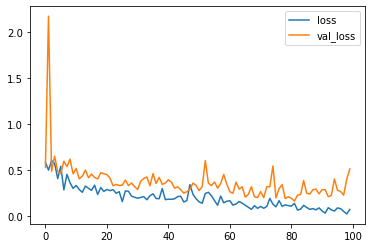

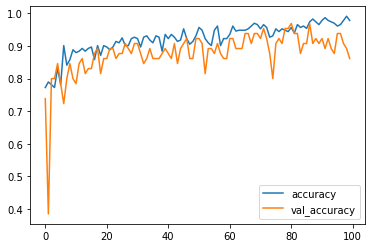

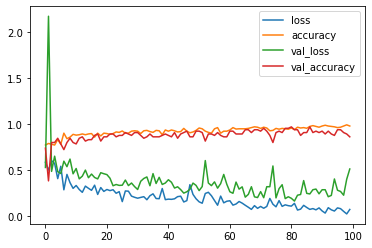

In [18]:
#training_accuracy 0.9785407781600952
#validation_accuracy 0.8615384697914124 - these are pretty good accuracy 
#now to check for the training loss
losses = pd.DataFrame(history.history)
losses.head()
losses[['loss','val_loss']].plot() 
losses[['accuracy','val_accuracy']].plot() 
losses.plot()

In [19]:
#we can save this model 
model.save('covid_model.h5')

5/5 [==============================] - 1s 232ms/step


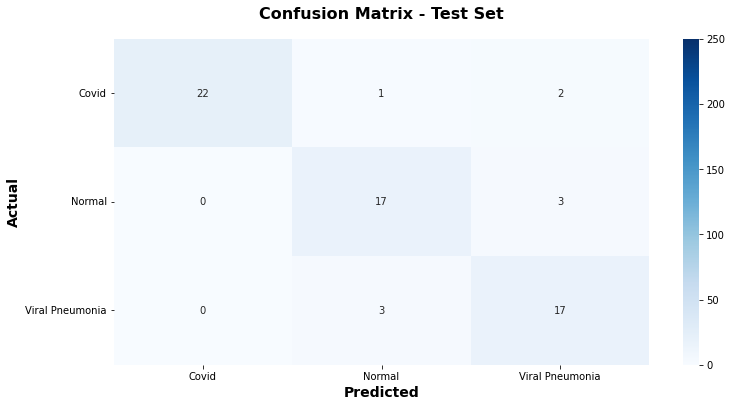

In [20]:
#this is the confusion matrix to demonstrate the effectiveness of the model presented
#since the sample is quite low, the number of determined true covid, normal, and viral pneumonia is low as well.
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


classes = ["Covid", "Normal", "Viral Pneumonia"]

y_pred = model.predict(test_set)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_set.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [21]:
#using table to demonstrate
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.81      0.85      0.83        20
           2       0.77      0.85      0.81        20

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.87      0.86      0.86        65



In [61]:
#we will not test our program with the pictures in our validation folder
class_dict = {0:'Covid',
              1:'Normal',
              2:'Viral Pneumonia'}

1/1 [==============================] - 0s 106ms/step
prediction:  Covid


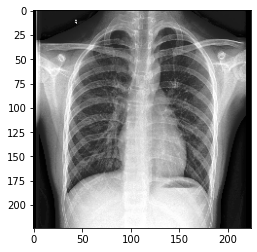

In [62]:
file_path =  '/validation/pic1.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 38ms/step
prediction:  Covid


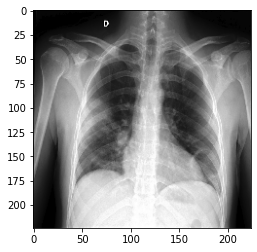

In [63]:
file_path =  '/validation/pic2.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 36ms/step
prediction:  Covid


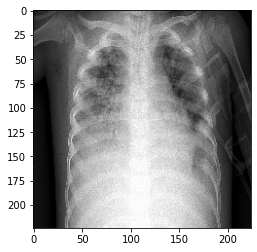

In [64]:
file_path =  '/validation/pic3.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 43ms/step
prediction:  Viral Pneumonia


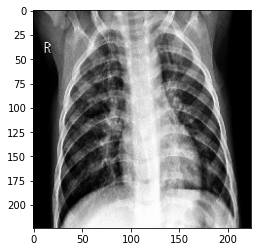

In [65]:
file_path =  '/validation/pic4.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 33ms/step
prediction:  Viral Pneumonia


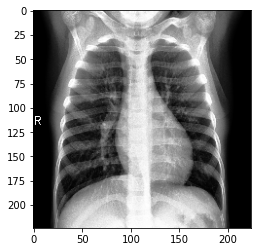

In [66]:
file_path =  '/validation/pic5.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 35ms/step
prediction:  Covid


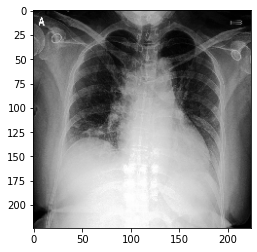

In [67]:
file_path =  '/validation/pic6.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 47ms/step
prediction:  Covid


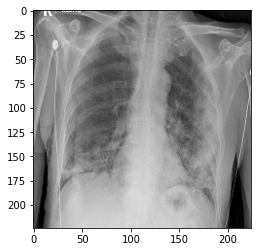

In [68]:
file_path =  '/validation/pic7.jpg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 45ms/step
prediction:  Viral Pneumonia


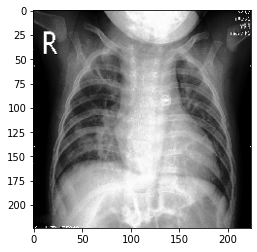

In [69]:
file_path =  '/validation/pic8.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 39ms/step
prediction:  Covid


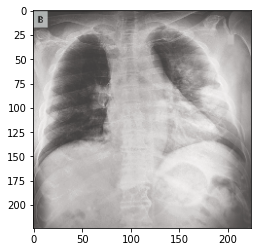

In [70]:
file_path =  '/validation/pic9.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 37ms/step
prediction:  Covid


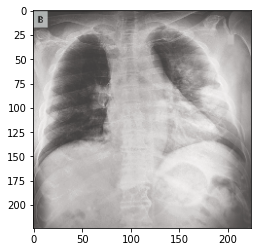

In [71]:
file_path =  '/validation/pic9.jpeg'
test_image = cv2.imread(data_path + file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

In [82]:
#saving to csv file
validation_result = {'': ['pic1', 'pic2', 'pic3', 'pic4', 'pic5', 'pic6', 'pic7', 'pic8', 'pic9', 'pic10'],
                'diagnosis*': ['C', 'C', 'C', 'V', 'V', 'C', 'C', 'V', 'V', 'V']}

df = pd.DataFrame(validation_result, columns = ['', 'diagnosis*'])
print(df)

         diagnosis*
0   pic1          C
1   pic2          C
2   pic3          C
3   pic4          V
4   pic5          V
5   pic6          C
6   pic7          C
7   pic8          V
8   pic9          V
9  pic10          V


In [77]:
df.to_csv('Espiritu_cnn_output_ex.csv', index=False)